In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import csv
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

key: 
df0 - 370
df1 - 372
df2 - 373
df3 - 374
df4 - 375
df5 - 376
df99 - All stores 

In [134]:
df0 = pd.read_excel (r'input/370.xlsx',header=[3])
df0.drop(columns=['Transaction Type', 'Reference Number', 'Customer Vendor #','Inventory Balance', 'Transaction Date.1','Reference Number.1', 'Created By', 'Created Date', 'Inventory Quantity','Transaction Type.1', 'Created Time', 'Last Changed By', 'Last Changed Date','Receiving PO Number', 'Last Changed Time' ], inplace=True)
df0.rename(columns={'Customer/Vendor Name' : 'Customer','Non-Inventory Quantity': 'Qty'}, inplace=True)
df0 = df0[df0.Customer != "TRANSFERS TO #372 J'VILLE"]
df0 = df0[df0.Customer != "TRANSFERS TO #374 SEYMOUR"]
df0 = df0[df0.Customer != "TRANSFERS TO #373 E-TOWN"]
df0 = df0[df0.Customer != "TRANSFERS TO #375 S'VILLE"]
df0 = df0[df0.Customer != "*** STORE TRANSFERS ***"]
df0 = df0[df0.Customer != "Beginning Balance"]
df0 = df0[df0.Customer != 'Net Activity']
df0 = df0[df0.Customer != 'Ending Balance']
df0 = df0[df0.Customer != 'VOID']
df0 = df0.dropna(how="all")

Gross = df0.Qty * df0.Price
df0['Gross'] = Gross.where(df0.Price == 'Qty', other=Gross)

Net = df0.Qty * df0.Cost 
df0['Net'] = Net.where(df0.Cost == 'Qty', other=Net)

Net = df0.Gross - df0.Net 
df0['Net'] = Net.where(df0.Gross == "Net", other=Net)

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [135]:
df0.head()

,Transaction Date,Customer,Qty,Price,Cost,Gross,Net


Total Gross: 0.0
Total Net: 0.0


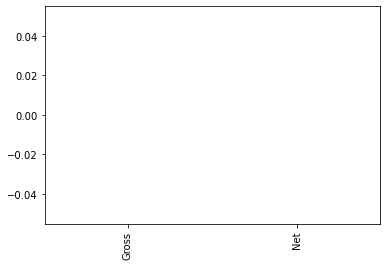

In [136]:
Net_Gross270 = {
    'Gross' : df0['Gross'].sum(),
    'Net' : df0['Net'].sum()
}


data = Net_Gross270
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.xticks(range(len(names)), names, rotation='vertical')
# plt.show()

Total_Gross = df0['Gross'].sum()
Total_net = df0['Net'].sum() 

print('Total Gross:',(Total_Gross))
print('Total Net:',(Total_net))

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


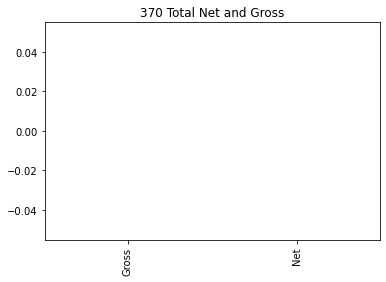

Total Gross: 0.0
Total Net: 0.0


In [137]:
df0 = pd.read_excel (r'input/370.xlsx',header=[3])
df0.drop(columns=['Transaction Type', 'Reference Number', 'Customer Vendor #','Inventory Balance', 'Transaction Date.1','Reference Number.1', 'Created By', 'Created Date', 'Inventory Quantity','Transaction Type.1', 'Created Time', 'Last Changed By', 'Last Changed Date','Receiving PO Number', 'Last Changed Time' ], inplace=True)
df0.rename(columns={'Customer/Vendor Name' : 'Customer','Non-Inventory Quantity': 'Qty', 'Transaction Date' : 'Date'}, inplace=True)
df0 = df0[df0.Customer != "TRANSFERS TO #372 J'VILLE"]
df0 = df0[df0.Customer != "TRANSFERS TO #374 SEYMOUR"]
df0 = df0[df0.Customer != "TRANSFERS TO #373 E-TOWN"]
df0 = df0[df0.Customer != "TRANSFERS TO #375 S'VILLE"]
df0 = df0[df0.Customer != "*** STORE TRANSFERS ***"]
df0 = df0[df0.Customer != "Beginning Balance"]
df0 = df0[df0.Customer != 'Net Activity']
df0 = df0[df0.Customer != 'Ending Balance']
df0 = df0[df0.Customer != 'VOID']
df0 = df0[df0.Customer != "TRANSFERS TO #376 L'VILLE"]
df0 = df0.dropna(how="all")
Gross = df0.Qty * df0.Price
df0['Gross'] = Gross.where(df0.Price == 'Qty', other=Gross)

Net = df0.Qty * df0.Cost 
df0['Net'] = Net.where(df0.Cost == 'Qty', other=Net)

Net = df0.Gross - df0.Net 
df0['Net'] = Net.where(df0.Gross == "Net", other=Net)

# Graph for total time span imported

Net_Gross270 = {
    'Gross' : df0['Gross'].sum(),
    'Net' : df0['Net'].sum()
}

data = Net_Gross270
names = list(data.keys())
values = list(data.values())

plt.title("370 Total Net and Gross")
plt.bar(range(len(data)), values, tick_label=names)
plt.xticks(range(len(names)), names, rotation='vertical')
plt.show()

Total_Gross = df0['Gross'].sum()
Total_net = df0['Net'].sum() 

print('Total Gross:',(Total_Gross))
print('Total Net:',(Total_net))

In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Date'] = df1['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df1 = df1.groupby(df1['Date']).aggregate(agg_functions)
print(df1)

# df_new.to_csv(r'df5.csv', index=False)

In [140]:
df0 = pd.read_excel (r'input/370.xlsx',header=[3]) 
df1 = pd.read_excel (r'input/372.xlsx',header=[3]) 
df2 = pd.read_excel (r'input/373.xlsx',header=[3]) 
df3 = pd.read_excel (r'input/374.xlsx',header=[3]) 
df4 = pd.read_excel (r'input/375.xlsx',header=[3]) 
df5 = pd.read_excel (r'input/376.xlsx',header=[3])  

dfs = [df0, df2, df3, df4, df5]

# dfs.drop(columns=['Transaction Type', 'Reference Number', 'Customer Vendor #','Inventory Balance', 'Transaction Date.1','Reference Number.1', 'Created By', 'Created Date', 'Inventory Quantity','Transaction Type.1', 'Created Time', 'Last Changed By', 'Last Changed Date','Receiving PO Number', 'Last Changed Time' ], inplace=True)
# dfs.rename(columns={'Customer/Vendor Name' : 'Customer','Non-Inventory Quantity': 'Qty', 'Transaction Date' : 'Date'}, inplace=True)
# dfs = dfs[df0.Customer != "TRANSFERS TO #372 J'VILLE"]
# dfs = dfs[df0.Customer != "TRANSFERS TO #374 SEYMOUR"]
# dfs = dfs[df0.Customer != "TRANSFERS TO #373 E-TOWN"]
# dfs = dfs[df0.Customer != "TRANSFERS TO #375 S'VILLE"]
# dfs = dfs[df0.Customer != "*** STORE TRANSFERS ***"]
# dfs = dfs[df0.Customer != "Beginning Balance"]
# dfs = dfs[df0.Customer != 'Net Activity']
# dfs = dfs[df0.Customer != 'Ending Balance']
# dfs = dfs[df0.Customer != 'VOID']
# dfs = dfs[df0.Customer != "TRANSFERS TO #376 L'VILLE"]
# dfs = dfs.dropna(how="all")
# Gross = df0.Qty * df0.Price
# dfs['Gross'] = Gross.where(dfs.Price == 'Qty', other=Gross)

# Net = dfs.Qty * dfs.Cost 
# dfs['Net'] = Net.where(df0.Cost == 'Qty', other=Net)

# Net = dfs.Gross - dfs.Net 
# dfs['Net'] = Net.where(df0.Gross == "Net", other=Net)
cut = ['Transaction Type', 'Reference Number', 'Customer Vendor #','Inventory Balance', 'Transaction Date.1','Reference Number.1', 'Created By', 'Created Date', 'Inventory Quantity','Transaction Type.1', 'Created Time', 'Last Changed By', 'Last Changed Date','Receiving PO Number', 'Last Changed Time']

for dfs in dfs:
    dfs[0:4].drop('Reference Number' , axis= 1, inplace=True)

print(df5)


    Transaction Date Transaction Type  Reference Number  Customer Vendor #  \
0         2022-11-18             INVC      3.760034e+09          9821021.0   
1         2022-11-18             INVC      3.760034e+09          9821021.0   
2         2022-11-16             INVC      3.760034e+09          9821021.0   
3         2022-11-16             INVC      3.760034e+09          2857412.0   
4         2022-11-16             INVC      3.760034e+09          2854962.0   
..               ...              ...               ...                ...   
402       2021-08-10             INVC      3.760011e+09          2857412.0   
403              NaT              NaN               NaN                NaN   
404              NaT              NaN               NaN                NaN   
405              NaT              NaN               NaN                NaN   
406              NaT              NaN               NaN                NaN   

          Customer/Vendor Name  Receiving PO Number  Inventory 

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
